# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [41]:
#checking cities in array
#cities[:10]
#lats[:10]
#lngs[:10]

In [42]:
# #test for successive API calls.
# test = 'jersey city'
# #lat = '-35.51896238'
# #lngs = '-114.5548006'
# url = "http://api.openweathermap.org/data/2.5/weather?"

# for i in test:
#     query_url = url + "appid=" + weather_api_key + "&q=" + test + "&units=imperial"
#     response = requests.get(query_url)
#     response_json = response.json()
#     city_name = response_json["name"]
#     print(f"found city {city_name}")

# print("------------------------")            
# print("Data Retrieval Complete")
# print("------------------------")
# response_json

# Example of json output, will help to get the correct fields for the API calls
$ {
"coord": {
"lon": -134.9692,
"lat": -23.1203
},
"weather": [
{
"id": 802,
"main": "Clouds",
"description": "scattered clouds",
"icon": "03n"
}
],
"base": "stations",
"main": {
"temp": 79.25,
"feels_like": 76.39,
"temp_min": 79.25,
"temp_max": 79.25,
"pressure": 1017,
"humidity": 75,
"sea_level": 1017,
"grnd_level": 1015
},
"visibility": 10000,
"wind": {
"speed": 19.19,
"deg": 112
},
"clouds": {
"all": 47
},
"dt": 1615439819,
"sys": {
"country": "PF",
"sunrise": 1615388393,
"sunset": 1615432824
},
"timezone": -32400,
"id": 4030556,
"name": "Rikitea",
"cod": 200
}

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
#Adding empty arrays to collect the data
url = "http://api.openweathermap.org/data/2.5/weather?"


city_list = []
country = []
lat = []
long = []
max_temp = []
cloudiness = []
humidity = []
wind_speed = []
date = []

#Set counter for successive API calls
counter = 0

print("Beginning Data Retrieval")
print("------------------------")
print("------------------------")

for city in cities:
    #city_name = city
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    response = requests.get(query_url)
    response_json = response.json()
    counter += 1
    try:
        print(f"Processing record {counter} of Set {len(cities)} | {city}")
        #appending to arrays
        city_list.append(response_json["name"])
        country.append(response_json["sys"]["country"])
        lat.append(response_json["coord"]["lat"])
        long.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        cloudiness.append(response_json["clouds"]["all"])
        humidity.append(response_json["main"]["humidity"])
        wind_speed.append(response_json["wind"]["speed"])
        date.append(response_json["dt"])
        
    except KeyError:
        print("Oopps, City not found.. skip, skip")
    time.sleep(1)
    
print("Data Retrieval Complete")
print("-----------------------")
print("-----------------------")
            

Beginning Data Retrieval
------------------------
------------------------
Processing record 1 of Set 617 | port elizabeth
Processing record 2 of Set 617 | sitka
Processing record 3 of Set 617 | hilo
Processing record 4 of Set 617 | celestun
Processing record 5 of Set 617 | butaritari
Processing record 6 of Set 617 | rikitea
Processing record 7 of Set 617 | lata
Processing record 8 of Set 617 | ilulissat
Processing record 9 of Set 617 | bucerias
Processing record 10 of Set 617 | carnarvon
Processing record 11 of Set 617 | vaini
Processing record 12 of Set 617 | castro
Processing record 13 of Set 617 | iqaluit
Processing record 14 of Set 617 | tuktoyaktuk
Processing record 15 of Set 617 | brasileia
Processing record 16 of Set 617 | bredasdorp
Processing record 17 of Set 617 | thompson
Processing record 18 of Set 617 | gravelbourg
Processing record 19 of Set 617 | hobart
Processing record 20 of Set 617 | cherskiy
Processing record 21 of Set 617 | ormara
Processing record 22 of Set 617 | 

Processing record 178 of Set 617 | tecoanapa
Processing record 179 of Set 617 | tuatapere
Processing record 180 of Set 617 | adrar
Processing record 181 of Set 617 | san cristobal
Processing record 182 of Set 617 | sinnamary
Processing record 183 of Set 617 | petropavlovsk-kamchatskiy
Processing record 184 of Set 617 | longyearbyen
Processing record 185 of Set 617 | carutapera
Processing record 186 of Set 617 | skjervoy
Processing record 187 of Set 617 | inirida
Processing record 188 of Set 617 | sao felix do xingu
Processing record 189 of Set 617 | ca mau
Processing record 190 of Set 617 | bischofswerda
Processing record 191 of Set 617 | yalutorovsk
Processing record 192 of Set 617 | terney
Processing record 193 of Set 617 | arman
Processing record 194 of Set 617 | atuona
Processing record 195 of Set 617 | roald
Processing record 196 of Set 617 | roma
Processing record 197 of Set 617 | bolungarvik
Oopps, City not found.. skip, skip
Processing record 198 of Set 617 | wilmington
Process

Processing record 350 of Set 617 | moron
Processing record 351 of Set 617 | katherine
Processing record 352 of Set 617 | mbeya
Processing record 353 of Set 617 | nemuro
Processing record 354 of Set 617 | kununurra
Processing record 355 of Set 617 | emerald
Processing record 356 of Set 617 | tandil
Processing record 357 of Set 617 | beaune
Processing record 358 of Set 617 | mareeba
Processing record 359 of Set 617 | riohacha
Processing record 360 of Set 617 | toliary
Oopps, City not found.. skip, skip
Processing record 361 of Set 617 | tutoia
Processing record 362 of Set 617 | burnie
Processing record 363 of Set 617 | shubarkuduk
Processing record 364 of Set 617 | ruatoria
Oopps, City not found.. skip, skip
Processing record 365 of Set 617 | richards bay
Processing record 366 of Set 617 | tautira
Processing record 367 of Set 617 | mahajanga
Processing record 368 of Set 617 | pafos
Processing record 369 of Set 617 | new norfolk
Processing record 370 of Set 617 | demba
Processing record 3

Processing record 523 of Set 617 | rongcheng
Processing record 524 of Set 617 | belousovka
Processing record 525 of Set 617 | kazalinsk
Oopps, City not found.. skip, skip
Processing record 526 of Set 617 | solovetskiy
Oopps, City not found.. skip, skip
Processing record 527 of Set 617 | kiunga
Processing record 528 of Set 617 | port-gentil
Processing record 529 of Set 617 | fethiye
Processing record 530 of Set 617 | belaya gora
Processing record 531 of Set 617 | la ronge
Processing record 532 of Set 617 | manyana
Processing record 533 of Set 617 | frontera
Processing record 534 of Set 617 | manggar
Processing record 535 of Set 617 | micheweni
Processing record 536 of Set 617 | wuda
Processing record 537 of Set 617 | antalaha
Processing record 538 of Set 617 | kismayo
Processing record 539 of Set 617 | tsogni
Processing record 540 of Set 617 | calabozo
Processing record 541 of Set 617 | ipojuca
Processing record 542 of Set 617 | plastun
Processing record 543 of Set 617 | nelson bay
Proc

In [73]:
#country

## Convert Raw Data to DataFrame
* Save as csv

In [44]:
raw_data_df = pd.DataFrame({
    "City": city_list,
    "Latitude": lat,
    "Longitude": long,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date})

#Changing date column from UNIX date to easy to read format
raw_data_df['Date'] = pd.to_datetime(raw_data_df['Date'], errors='coerce', unit='s')
raw_data_df.head()



,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,66.20,88,20,13.80,ZA,2021-03-12 03:03:14
1,Sitka,57.0531,-135.3300,35.60,64,90,6.69,US,2021-03-12 03:03:16
2,Hilo,19.7297,-155.0900,75.20,83,90,9.22,US,2021-03-12 03:03:17
3,Celestún,20.8667,-90.4000,76.69,73,3,17.60,MX,2021-03-12 03:03:18
4,Butaritari,3.0707,172.7902,81.91,74,0,13.24,KI,2021-03-12 03:03:19


In [45]:
#Saving to CSV
raw_data_df.to_csv("output_data/cities.csv", encoding='utf-8', index=False)

In [46]:
raw_data_df.count()

City               566
Latitude           566
Longitude          566
Max Temperature    566
Humidity           566
Cloudiness         566
Wind Speed         566
Country            566
Date               566
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

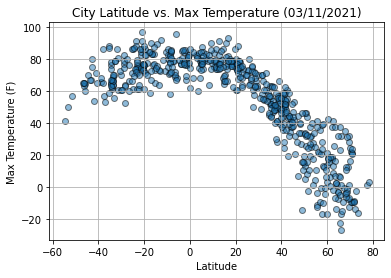

In [47]:
today_date = pd.to_datetime('today').strftime('%m/%d/%Y')

plt.scatter(raw_data_df["Latitude"], raw_data_df["Max Temperature"], edgecolors='black', alpha=.5)

# add labels and title
plt.title(f"City Latitude vs. Max Temperature ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("images/lat_vs_temp.png")
plt.show()

### Latitude vs. Humidity Plot

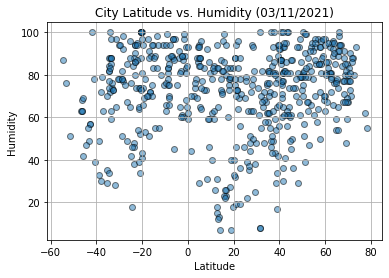

In [48]:
today_date = pd.to_datetime('today').strftime('%m/%d/%Y')

plt.scatter(raw_data_df["Latitude"], raw_data_df["Humidity"], edgecolors='black', alpha=.5)

# add labels and title
plt.title(f"City Latitude vs. Humidity ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.savefig("images/lat_vs_humidity.png")
plt.show()

### Latitude vs. Cloudiness Plot

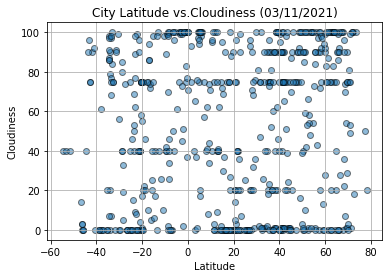

In [49]:
today_date = pd.to_datetime('today').strftime('%m/%d/%Y')

plt.scatter(raw_data_df["Latitude"], raw_data_df["Cloudiness"], edgecolors='black', alpha=.5)

# add labels and title
plt.title(f"City Latitude vs.Cloudiness ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.savefig("images/lat_vs_cloudiness.png")
plt.show()

### Latitude vs. Wind Speed Plot

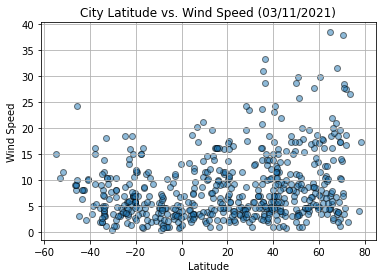

In [50]:
today_date = pd.to_datetime('today').strftime('%m/%d/%Y')

plt.scatter(raw_data_df["Latitude"], raw_data_df["Wind Speed"], edgecolors='black', alpha=.5)

# add labels and title
plt.title(f"City Latitude vs. Wind Speed ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.savefig("images/lat_vs_wind_speed.png")
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

In [51]:
def linear_regression_function(x_values, y_values):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=10, color="red")
    print(f"The r-value is: {rvalue}")

In [52]:
#reopen CVS file to read the dataframe so we don't need to run all the code if you exited the notebook.
cities_df = pd.read_csv("output_data/cities.csv")
cities_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,66.20,88,20,13.80,ZA,2021-03-12 03:03:14
1,Sitka,57.0531,-135.3300,35.60,64,90,6.69,US,2021-03-12 03:03:16
2,Hilo,19.7297,-155.0900,75.20,83,90,9.22,US,2021-03-12 03:03:17
3,Celestún,20.8667,-90.4000,76.69,73,3,17.60,MX,2021-03-12 03:03:18
4,Butaritari,3.0707,172.7902,81.91,74,0,13.24,KI,2021-03-12 03:03:19


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8993882059958188


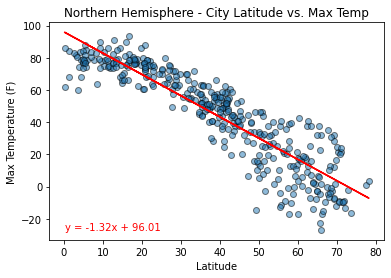

In [53]:
#Tip to find the nothern hemisphere cities... find cities with latitude greater than 0.
#Lat 0 marks the equator
NH_cities = cities_df.loc[cities_df['Latitude'] > 0]
nh_x_values = NH_cities["Latitude"]
nh_y_values = NH_cities["Max Temperature"]
# nh_x_values
# nh_y_values
plt.scatter(nh_x_values, nh_y_values, edgecolors='black', alpha=.5)
plt.title("Northern Hemisphere - City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
linear_regression_function(nh_x_values,nh_y_values)

plt.savefig("images/northern_hem_lat_temp.png")
plt.show()


###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4836020032805546


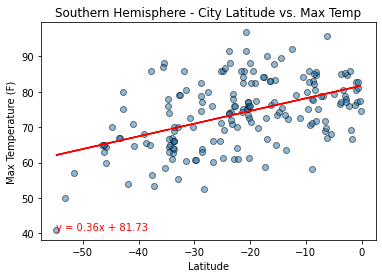

In [54]:
SH_cities = cities_df.loc[cities_df['Latitude'] < 0]
sh_x_values = SH_cities["Latitude"]
sh_y_values = SH_cities["Max Temperature"]
# nh_x_values
# nh_y_values
plt.scatter(sh_x_values, sh_y_values, edgecolors='black', alpha=.5)
plt.title("Southern Hemisphere - City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
linear_regression_function(sh_x_values,sh_y_values)

plt.savefig("images/southern_hem_lat_temp.png")
plt.show()


###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2755843923629325


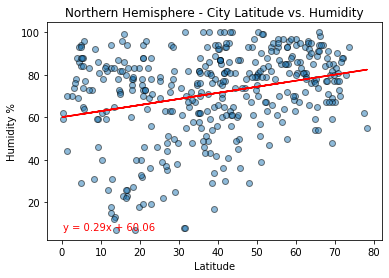

In [55]:
humidity_y_value = NH_cities["Humidity"]
#humidity_y_value

plt.scatter(nh_x_values, humidity_y_value, edgecolors='black', alpha=.5)
plt.title("Northern Hemisphere - City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
linear_regression_function(nh_x_values,humidity_y_value)

plt.savefig("images/northern_hem_humidity_temp.png")
plt.show()


###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.30368077904500834


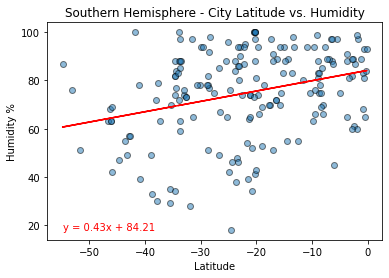

In [56]:
sh_humidity_y_value = SH_cities["Humidity"]
#humidity_y_value

plt.scatter(sh_x_values, sh_humidity_y_value, edgecolors='black', alpha=.5)
plt.title("Southern Hemisphere - City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
linear_regression_function(sh_x_values,sh_humidity_y_value)

plt.savefig("images/southern_hem_humidity_temp.png")
plt.show()

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1389750582501846


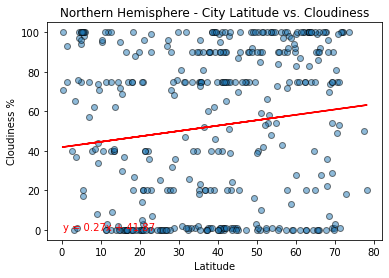

In [57]:
cloudiness_y_value = NH_cities["Cloudiness"]
#humidity_y_value

plt.scatter(nh_x_values, cloudiness_y_value, edgecolors='black', alpha=.5)
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
linear_regression_function(nh_x_values,cloudiness_y_value)

plt.savefig("images/northern_hem_cloudiness_temp.png")
plt.show()


###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2422653716466425


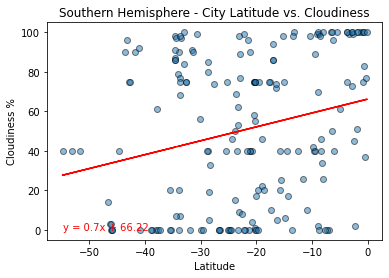

In [58]:
sh_cloudiness_y_value = SH_cities["Cloudiness"]
#humidity_y_value

plt.scatter(sh_x_values, sh_cloudiness_y_value, edgecolors='black', alpha=.5)
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
linear_regression_function(sh_x_values,sh_cloudiness_y_value)

plt.savefig("images/southern_hem_cloudiness_temp.png")
plt.show()


###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.20338507290647453


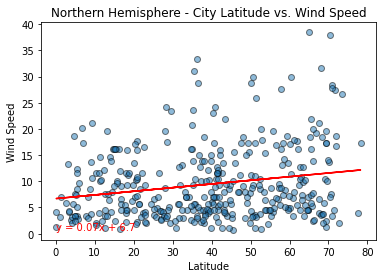

In [59]:
windspeed_y_value = NH_cities["Wind Speed"]
#humidity_y_value

plt.scatter(nh_x_values, windspeed_y_value, edgecolors='black', alpha=.5)
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
linear_regression_function(nh_x_values,windspeed_y_value)

plt.savefig("images/northern_hem_windspeed.png")
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.29251328437823537


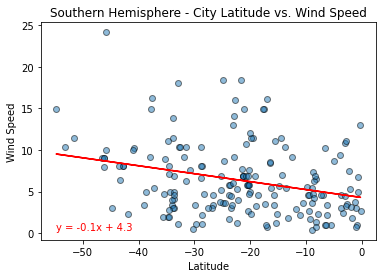

In [60]:
sh_windspeed_y_value = SH_cities["Wind Speed"]
#humidity_y_value

plt.scatter(sh_x_values, sh_windspeed_y_value, edgecolors='black', alpha=.5)
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
linear_regression_function(sh_x_values,sh_windspeed_y_value)

plt.savefig("images/southern_hem_windspeed.png")
plt.show()